# Sub Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Generate the data
Create random points in the interval [-1, 1] with mean 0

In [2]:
def generate_the_data(point_num, interval=[-1.0, 1.0]):
    # Generate the points (x,y): make sure the mean is 0
    point_x = np.array([100, -100])
    while point_x.max()>1.0 and point_x.min()<-1.0:
        point_x = np.random.uniform(low=interval[0], high=interval[1], size=point_num)
        point_x -= point_x.mean()
    
    # y is column vector
    point_y = np.random.uniform(low=-1, high=1, size=point_num)[:, np.newaxis] #column vector
    return point_x, point_y

point_num = 5
point_x, point_y = generate_the_data(5)
print('Generated the data. \nThe points x: {}.\nThe point y:{}'.format(point_x,point_y.transpose()))

Generated the data. 
The points x: [ 0.58907741  0.48979107 -0.19423012 -0.22841195 -0.65622642].
The point y:[[-0.98091942 -0.19408088 -0.85474682 -0.24851126 -0.76293499]]


## X data matrix
create data matrix
$X = \begin{bmatrix}
    1       & 1 & 1 & \dots & 1\\
    x_1       & x_{2} & x_{3} & \dots & x_{point\_num} \\
     \vdots & \vdots  & \vdots  & \dots & \vdots\\
    x_{1}^{poly\_degree}     & x_{2}^{poly\_degree} & x_{3}^{poly\_degree} & \dots & x_{point\_num}^{poly\_degree}
\end{bmatrix}$

$y= X^T \theta + e$

In [3]:
def create_data_matrix(point_x, poly_degree):
    X = []
    for n in range(poly_degree + 1):
        # create feature vector and add to data matrix
        X.append(point_x**n)
    X = np.asarray(X)
    return X
poly_degree = 1
X = create_data_matrix(point_x, poly_degree)
print('The data matrix X: {}'.format(X))

The data matrix X: [[ 1.          1.          1.          1.          1.        ]
 [ 0.58907741  0.48979107 -0.19423012 -0.22841195 -0.65622642]]


## Least sqaure estimator
 $\theta=(XX^T)^{-1}Xy$

In [4]:
def fit_least_sqaures_estimator(X, point_y, poly_degree, lamb=0, interval=[-1, 1]):
    XX_T = np.matmul(X, X.transpose()) 
    theta = np.linalg.inv(XX_T + lamb * np.eye(XX_T.shape[0], XX_T.shape[1])).dot(X).dot(point_y)
    y_least_square = []
    x_least_square = np.linspace(interval[0], interval[1], 100)[:, np.newaxis]
    for x_n in x_least_square.tolist():
        temp = []
        for n in range(poly_degree + 1):
            temp.append(np.array(x_n)**n)
        x_n = np.asarray(temp)

        y_least_square.append(float(x_n.transpose().dot(theta)))
    return theta, x_least_square.tolist(), y_least_square
theta, x_least_square, y_least_square = fit_least_sqaures_estimator(X, point_y, poly_degree)

# Calculate the Regret

Regret: $ log(\Gamma) = -log(1 - x_N^T (XX^T)^{-1} x_N) $

In [5]:
def calc_regret(X, poly_degree, lamb=0, interval=[-1, 1]):
    XX_T = np.matmul(X,X.transpose())
    xxt_inv = np.linalg.inv(XX_T + lamb * np.eye(XX_T.shape[0], XX_T.shape[1])) + np.finfo(float).eps

    regret = []
    x_values = np.linspace(interval[0], interval[1], 1000)
    x_axis_values_list = []
    for x_value in x_values:
        
        # create feature vector [1 x x^2 ...]^T
        x_n = []
        for n in range(poly_degree + 1):
            x_n.append(np.array(x_value)**n)
        x_n = np.expand_dims(np.asarray(x_n), 1)
        
        gamma = 1 - np.matmul(np.matmul(x_n.transpose(), xxt_inv), x_n)
        if gamma <= 0:
            continue
        regret.append(-np.log10(gamma))
        x_axis_values_list.append(x_value)
    regret = np.asarray(regret).squeeze(-1)
    return x_axis_values_list, regret

x_axis_values, regret_values = calc_regret(X, poly_degree)

# Run simulation
1. create random points in the interval [-1, 1] with mean 0
2. create data matrix X
3. fit Least sqaure estimator $\theta=(XX^T)^{-1}Xy$
4. calculate and plot the Regret: $ log(\Gamma) = -log(1 - x_N^T (XX^T)^{-1} x_N) $

In [15]:
#----------------------
# 0. Parameters
#----------------------

# seed for random
np.random.seed(1234)

# number of data point to train on
point_num = 10

# Polynom degree to fit
poly_degree = 4

# Regularization Term
lamb = 0

#----------------------
# 1. Generate the data
#----------------------
point_x, point_y = generate_the_data(point_num)
print('1. Generated the data.\n x:{}.\n y:{}.'.format(point_x, point_y.transpose()))

#----------------------
# 2. Create data matrix
#----------------------
X = create_data_matrix(point_x, poly_degree)
print('2. Created the matrix data X')

#----------------------
# 3. Fit least sqaure estimator
#----------------------
theta, x_list_square, y_list_sqaure = fit_least_sqaures_estimator(X, point_y, poly_degree, lamb=lamb)
print('3. Fit least sqaure estimator. Theta={}'.format(np.round(theta.transpose(),3)))

#----------------------
# 4. calculate the regret
#----------------------
x_values, regret_values = calc_regret(X, poly_degree, lamb=lamb)
print('4. Calculate the regret')
    

1. Generated the data.
 x:[-0.81729937  0.04387927 -0.3248828   0.37037889  0.35961334 -0.65515307
 -0.64740977  0.40340608  0.71594043  0.55152699].
 y:[[-0.28436546  0.00199025  0.36692587  0.42540405 -0.25949849  0.12239237
   0.00616633 -0.9724631   0.54565324  0.76528238]].
2. Created the matrix data X
3. Fit least sqaure estimator. Theta=[[-0.016 -0.932  0.845  2.808 -0.266]]
4. Calculate the regret


# Plot

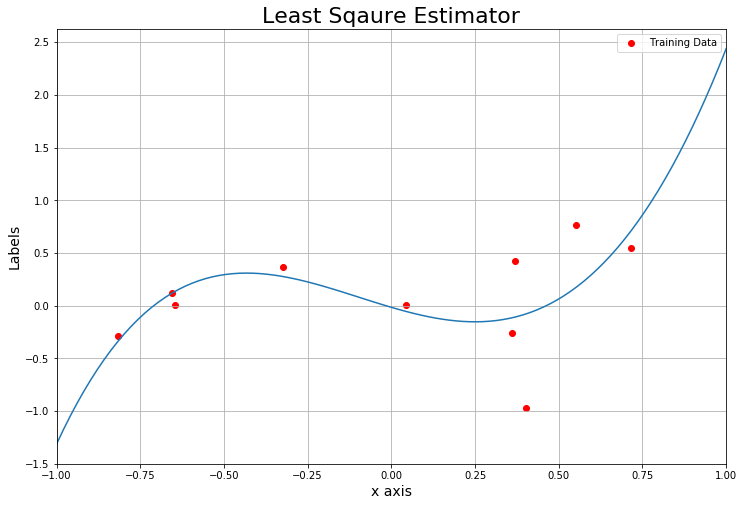

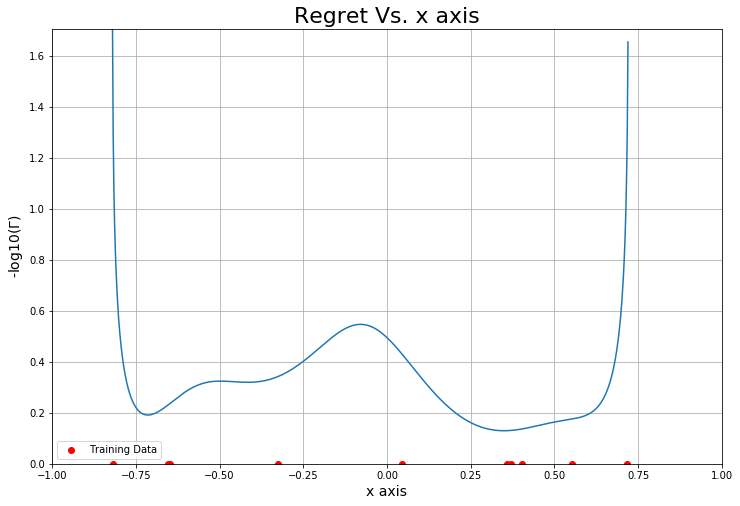

In [16]:
# Plot the estimated labels on the interval [-1, 1]
plt.figure(figsize=(12, 8))
plt.plot(x_list_square,  y_list_sqaure)
plt.scatter(point_x, point_y, label='Training Data', c='r')
plt.grid()
plt.ylabel('Labels', fontsize=14)
plt.xlabel('x axis', fontsize=14)
plt.title('Least Sqaure Estimator', fontsize=22)
plt.xlim([-1, 1])
plt.legend()
plt.show()

# Regret
plt.figure(figsize=(12, 8))
plt.plot(x_values, regret_values)
plt.scatter(point_x, np.zeros(point_x.shape), c='r', label='Training Data')
plt.grid()
plt.title('Regret Vs. x axis', fontsize=22)
plt.xlabel('x axis', fontsize=14)
plt.ylabel(r"-log10($\Gamma$)", fontsize=14)
plt.ylim([0, regret_values.max()])
plt.xlim([-1, 1])
plt.legend()
plt.show()


# Iterate on lambda

In [21]:
def regret_simulation(point_num, poly_degree, lamb=0):
    
    # output- each entry is for diffrent lambda
    results_list = []
    
    # Generate the data
    point_x, point_y = generate_the_data(point_num)
    print('1. Generated the data.\n x:{}.\n y:{}.'.format(point_x, point_y.transpose()))

    if isinstance(lamb, int):
        lamb = [lamb]
    
    for lamb_single in lamb:
    
        # Create data matrix
        X = create_data_matrix(point_x, poly_degree)

        # Fit least sqaure estimator
        theta, x_list_square, y_list_sqaure = fit_least_sqaures_estimator(X, point_y, poly_degree, lamb=lamb_single)

        # calculate the regret
        x_values, regret_values = calc_regret(X, poly_degree, lamb=lamb_single)
        
        results_dict = {'point_x': point_x, 
                        'point_y': point_y, 
                        'x_list_square': x_list_square, 
                        'y_list_sqaure': y_list_sqaure, 
                        'x_values': x_values, 
                        'regret_values': regret_values,
                        'lamb': lamb_single}
        results_list.append(results_dict)
    
    return results_list

In [38]:
# number of data point to train on
point_num = 10

# Polynom degree to fit
poly_degree = 5

# Regularization Term
lamb_list = [0, 0.1, 1]

results_list = regret_simulation(point_num, poly_degree, lamb=lamb_list)


1. Generated the data.
 x:[ 0.53958477  0.88644352  0.64459545  0.28457741 -0.33148166 -0.61094162
 -0.24338283  0.4013714  -0.76704707 -0.80371936].
 y:[[-0.35361037  0.18096361  0.70779713 -0.42587515 -0.65386555 -0.73195759
   0.98930766 -0.64100426 -0.36490635  0.13658281]].


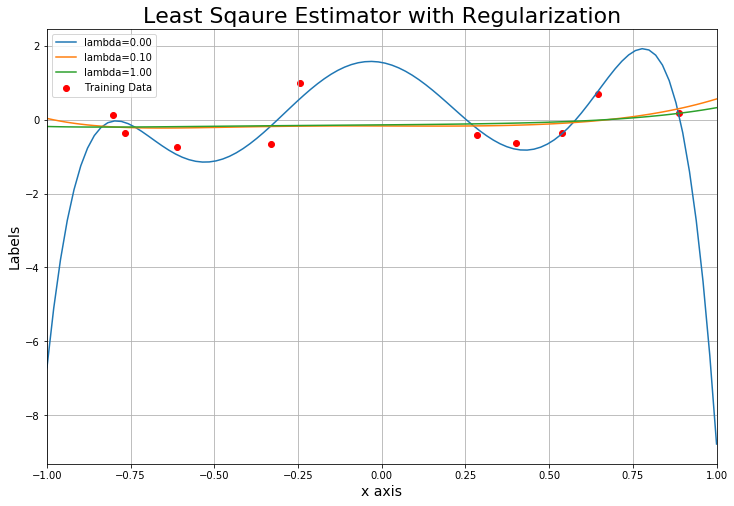

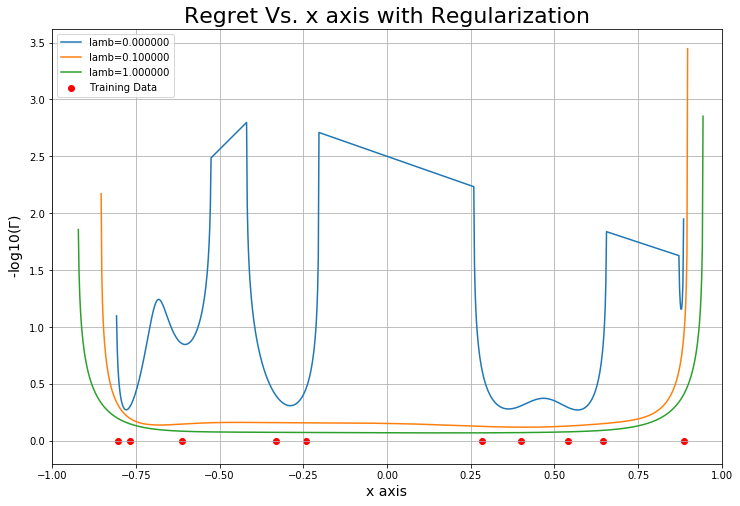

In [39]:
# Plot the estimated labels on the interval [-1, 1]
plt.figure(figsize=(12, 8))
for iter_idx, result_single in enumerate(results_list):
    x_list_square,  y_list_sqaure = result_single['x_list_square'], result_single['y_list_sqaure']
    point_x, point_y = result_single['point_x'], result_single['point_y']
    plt.plot(x_list_square,  y_list_sqaure, label='lambda=%0.2f' % result_single['lamb'])
    if iter_idx == 0:
        plt.scatter(point_x, point_y, label='Training Data', c='r')
plt.grid()
plt.ylabel('Labels', fontsize=14)
plt.xlabel('x axis', fontsize=14)
plt.title('Least Sqaure Estimator with Regularization', fontsize=22)
plt.xlim([-1, 1])
plt.legend()
plt.show()

# Regret
plt.figure(figsize=(12, 8))
for iter_idx, result_single in enumerate(results_list):
    x_values,  regret_values = result_single['x_values'], result_single['regret_values']
    plt.plot(x_values, regret_values, label='lamb=%02f' %  result_single['lamb'])
plt.scatter(point_x, np.zeros(point_x.shape), c='r', label='Training Data')
plt.grid()
plt.title('Regret Vs. x axis with Regularization', fontsize=22)
plt.xlabel('x axis', fontsize=14)
plt.ylabel(r"-log10($\Gamma$)", fontsize=14)
# plt.ylim([0, regret_values.max()])
plt.xlim([-1, 1])
plt.legend()
plt.show()
